### First regression models in ER131

In this notebook we'll import some familiar data, from [this](https://www.nature.com/articles/s41586-021-04190-y) paper, data available [here](https://github.com/xiaodan-zhou/pm25_and_disparity/tree/main).

Our objective is to try a few basic regression models and begin comparing their output.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

There are a number of data sets in the Jbaily github repo.  Let's look at the first one:

In [2]:
!ls JbailyData/

Icon?          data_part2.csv data_part4.csv
data_part1.csv data_part3.csv data_part5.csv


In [3]:
j_dat = pd.read_csv('JbailyData/data_part1.csv')
j_dat.describe()

,Unnamed: 0,year,ZIP,zcta,popdensity,population,poverty,education,pct_blk,pct_hisp,...,pct_asian,pct_white,black_pop,hisp_pop,native_pop,asian_pop,white_pop,medhouseholdincome,pm25,urban
count,160000.000000,160000.000000,160000.000000,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,...,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,136783.000000,138729.000000,123938.000000
mean,80000.500000,2008.999944,11334.088894,11446.410826,3526.180556,12487.787330,0.096838,0.257361,0.076807,0.076972,...,0.028943,0.849529,1861.375596,1984.577920,35.201225,655.272078,8984.549099,57944.488555,9.335779,0.527207
std,46188.165873,5.477272,6196.247049,6073.580649,10328.719507,15667.648525,0.108387,0.170012,0.161330,0.166514,...,0.056419,0.208612,5597.368951,6751.552843,88.302564,2109.437224,10846.833522,28197.893562,3.135279,0.499261
min,1.000000,2000.000000,1.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079008,0.000000
25%,40000.750000,2004.000000,5772.000000,6024.000000,88.896460,1417.000000,0.036859,0.136691,0.002109,0.006860,...,0.001200,0.813971,3.978935,12.428681,0.000000,2.000000,1250.000000,39167.000000,6.932353,0.000000
50%,80000.500000,2009.000000,12409.000000,12474.000000,435.489800,5593.667000,0.068577,0.232380,0.012765,0.021795,...,0.007947,0.943190,74.999998,125.000000,6.487409,44.000000,4430.678000,51907.890000,9.116726,1.000000
75%,120000.250000,2014.000000,16634.000000,16631.000000,2377.745000,18189.170000,0.114428,0.350261,0.061745,0.065451,...,0.030285,0.978706,884.422600,877.000000,33.816190,443.108900,13437.255000,71000.000000,11.450000,1.000000
max,160000.000000,2018.000000,21111.000000,22302.000000,153867.700000,143987.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,87209.000000,142800.000000,2944.000000,60815.000000,121486.000000,250001.000000,18.700000,1.000000


You can see there is a `ZIP` feature.  Let's dig in to that a little further:

In [4]:
for i in np.arange(1,6):
    file = 'JbailyData/data_part'+str(i)+'.csv'
    j_dat = pd.read_csv(file)
    print('min and max zip code are ', min(j_dat.ZIP), 'and ', max(j_dat.ZIP))

min and max zip code are  1 and  21111
min and max zip code are  21111 and  39652
min and max zip code are  39652 and  59018
min and max zip code are  59018 and  78265
min and max zip code are  78265 and  99950


Now you can see each file contains a range of zip codes.  Let's work with the middle of the country -- data file 2.

In [5]:
j_dat = pd.read_csv('JbailyData/data_part2.csv')
j_dat.describe()

,Unnamed: 0,year,ZIP,zcta,popdensity,population,poverty,education,pct_blk,pct_hisp,...,pct_asian,pct_white,black_pop,hisp_pop,native_pop,asian_pop,white_pop,medhouseholdincome,pm25,urban
count,160000.000000,160000.000000,160000.000000,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,...,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,139401.000000,141904.000000,121316.000000
mean,240000.500000,2008.999950,30563.011781,30568.179511,947.293577,13701.007496,0.129991,0.345672,0.201539,0.057108,...,0.013421,0.749809,3212.016973,1322.592727,54.195005,334.415200,9515.772164,42640.639654,10.485409,0.397021
std,46188.165873,5.477262,5170.669462,5170.527959,1904.760113,14622.186105,0.112916,0.195251,0.227585,0.102262,...,0.027130,0.234340,6041.802080,3623.530892,252.976311,877.358013,10386.512680,18350.859234,2.562513,0.489282
min,160001.000000,2000.000000,21111.000000,20106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,0.000000
25%,200000.750000,2004.000000,26267.000000,26269.000000,46.689660,1901.012000,0.060391,0.202187,0.023370,0.007296,...,0.000000,0.622540,81.897100,17.000000,0.000000,0.000000,1327.824000,31093.130000,8.509678,0.000000
50%,240000.500000,2009.000000,30350.000000,30328.000000,152.900900,7678.000000,0.107729,0.327319,0.113655,0.023580,...,0.004166,0.818928,804.156500,183.855700,14.920930,31.000000,5253.487000,38787.300000,10.282115,0.000000
75%,280000.250000,2014.000000,34981.000000,34990.000000,976.850100,22167.000000,0.171141,0.466513,0.311419,0.062033,...,0.015154,0.940601,3529.051000,1048.028000,58.404510,272.000000,15462.110000,49864.000000,12.300000,1.000000
max,320000.000000,2018.000000,39652.000000,39652.000000,40795.760000,93372.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,65284.000000,73752.000000,10325.000000,17317.000000,71777.000000,250001.000000,21.800000,1.000000


How many NaNs are in the data? 

In [6]:
np.sum(j_dat.isna())

Unnamed: 0                0
year                      0
ZIP                       0
zcta                  20599
popdensity            20599
population            20599
poverty               20599
education             20599
pct_blk               20599
pct_hisp              20599
pct_native            20599
pct_asian             20599
pct_white             20599
black_pop             20599
hisp_pop              20599
native_pop            20599
asian_pop             20599
white_pop             20599
medhouseholdincome    20599
pm25                  18096
urban                 38684
dtype: int64

In [7]:
# there is a large number of NaNs in the data so we're going to sloppily drop them
j_dat= j_dat.dropna(axis= 0) # axis = 0 means we drop *rows* with NaNs. (axis = 1 drops columns)
j_dat.describe()

,Unnamed: 0,year,ZIP,zcta,popdensity,population,poverty,education,pct_blk,pct_hisp,...,pct_asian,pct_white,black_pop,hisp_pop,native_pop,asian_pop,white_pop,medhouseholdincome,pm25,urban
count,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,...,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000,105571.000000
mean,239799.111167,2008.015904,30548.910600,30548.910600,707.862158,10584.029892,0.130057,0.360734,0.185487,0.050606,...,0.010463,0.771416,2285.032435,1018.710080,46.066863,232.366001,7586.127158,42461.225569,10.264161,0.390183
std,46538.939058,4.895446,5212.505079,5212.505079,1672.337045,13029.850830,0.116481,0.203527,0.224633,0.099294,...,0.024238,0.231445,4910.025243,3375.612554,269.038032,711.395089,9411.933882,18279.836762,2.454352,0.487793
min,160001.000000,2000.000000,21111.000000,21111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,0.000000
25%,199312.500000,2004.000000,26181.000000,26181.000000,37.243870,1317.928500,0.057351,0.213115,0.013351,0.005047,...,0.000000,0.654897,34.000000,8.000000,0.000000,0.000000,943.840000,31076.750000,8.364286,0.000000
50%,238344.000000,2008.000000,30250.000000,30250.000000,94.853650,4721.253000,0.107424,0.343563,0.093425,0.018366,...,0.002487,0.849282,452.000000,87.917980,7.986124,11.000000,3432.284000,38707.000000,10.100000,0.000000
75%,281509.500000,2012.000000,35112.000000,35112.000000,499.209650,15904.835000,0.173629,0.487805,0.282565,0.052562,...,0.010774,0.955436,2105.304500,625.000000,41.913360,137.890000,11178.500000,49444.000000,12.070575,1.000000
max,320000.000000,2016.000000,39652.000000,39652.000000,40795.760000,93372.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,65284.000000,73752.000000,10325.000000,17317.000000,71777.000000,250001.000000,21.575000,1.000000


We're going to work mainly with poverty rates and pm2.5 concentrations in this notebook and you can see that the summary stats don't change a lot with the dropped data.

Let's plot these data:

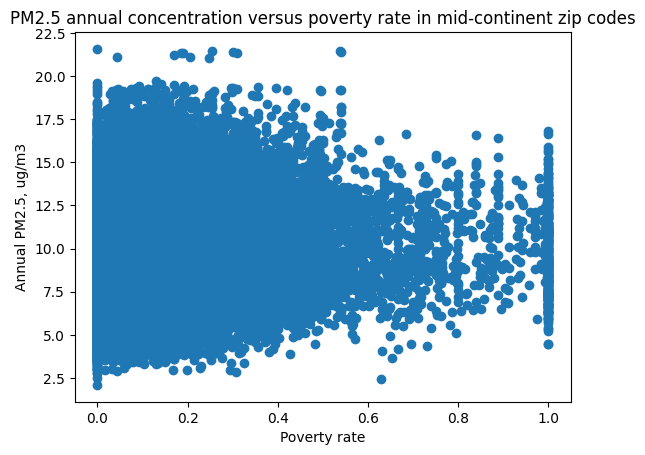

In [8]:
plt.scatter(j_dat.poverty, j_dat.pm25);
plt.title('PM2.5 annual concentration versus poverty rate in mid-continent zip codes');
plt.xlabel('Poverty rate');
plt.ylabel('Annual PM2.5, ug/m3');

Now let's try building a KNN model that relates poverty to PM2.5 concentrations.

Note I'm first going to make some data sets to train with.  There is some re-shaping I'll do of the data -- this is to keep scikit-learn happy with the form of the data we pass in.  You'll need to always do this.

In [9]:
X = j_dat.poverty.values.reshape(-1,1)
y = j_dat.pm25.values.reshape(-1,1)

Now let's partition the data into training and testing data:

In [10]:
lnth = X.shape[0]
train_dat = np.random.rand(lnth) > 0.2
X_train = X[train_dat]
y_train = y[train_dat]
X_test = X[~train_dat]
y_test = y[~train_dat]

Finally let's create a line of data corresponding to the range of x-values in the data -- this will be useful for plotting results later.

In [15]:
X_line = np.linspace(min(X_train), max(X_train)) # without any other arguments, linspace creates 50 evenly spaced points
print(X_line)

[[0.        ]
 [0.02040816]
 [0.04081633]
 [0.06122449]
 [0.08163265]
 [0.10204082]
 [0.12244898]
 [0.14285714]
 [0.16326531]
 [0.18367347]
 [0.20408163]
 [0.2244898 ]
 [0.24489796]
 [0.26530612]
 [0.28571429]
 [0.30612245]
 [0.32653061]
 [0.34693878]
 [0.36734694]
 [0.3877551 ]
 [0.40816327]
 [0.42857143]
 [0.44897959]
 [0.46938776]
 [0.48979592]
 [0.51020408]
 [0.53061224]
 [0.55102041]
 [0.57142857]
 [0.59183673]
 [0.6122449 ]
 [0.63265306]
 [0.65306122]
 [0.67346939]
 [0.69387755]
 [0.71428571]
 [0.73469388]
 [0.75510204]
 [0.7755102 ]
 [0.79591837]
 [0.81632653]
 [0.83673469]
 [0.85714286]
 [0.87755102]
 [0.89795918]
 [0.91836735]
 [0.93877551]
 [0.95918367]
 [0.97959184]
 [1.        ]]


"sci-kit learn" is a python package that we'll use a lot this semester. It is a library -- like numpy, or pandas, or matplotlib -- that is very useful for building prediction models.

Below we'll import the KNN regression sublibrary from sci-kit learn.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

Now let's try to build a KNN model: 

Text(0.5, 1.0, 'KNN fit, N = 10, PM2.5 versus poverty rates')

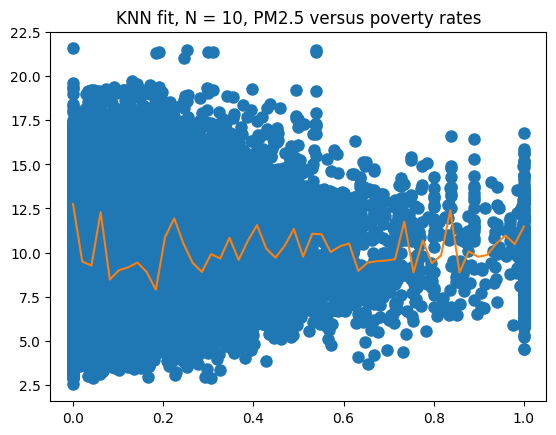

In [19]:
reg = KNeighborsRegressor(n_neighbors=10) # first instantiate the model
reg.fit(X_train, y_train) # then train it
plt.plot(X_train, y_train, 'o', markersize=8) # plot the data
plt.plot(X_line, reg.predict(X_line)) # plot regularly spaced predictions
plt.title('KNN fit, N = 10, PM2.5 versus poverty rates')

Now let's try this for a range of neighbor sizes:

KNN test MSE for 10  neighbors is  7.345696278558409
KNN test MSE for 100  neighbors is  6.151084470601904
KNN test MSE for 500  neighbors is  6.095399128927813
KNN test MSE for 1000  neighbors is  5.987039932609089


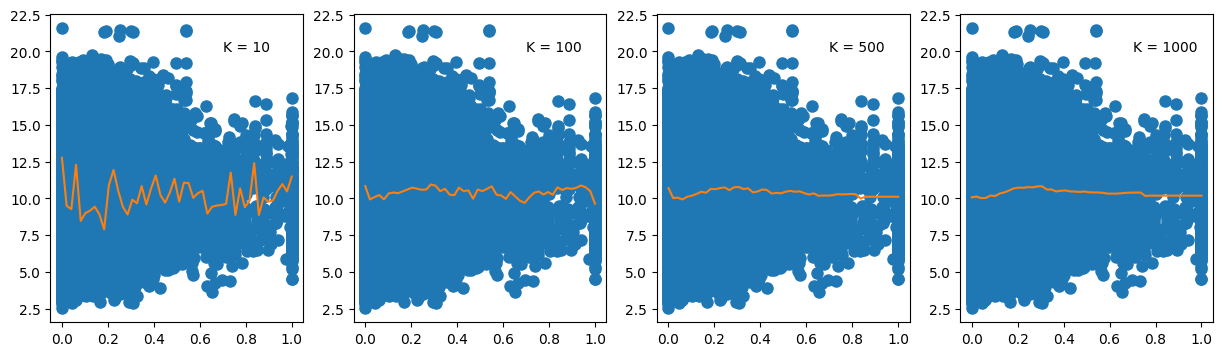

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
for n_neighbors, ax in zip([10, 100, 500, 1000], axes):
    # make predictions using 10, 100, or 500 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X_train, y_train, 'o', markersize=8)
    ax.plot(X_line, reg.predict(X_line))
    ttl = 'K = ' + str(n_neighbors)
    ax.text(0.7,20,ttl)
    Y_hat_test_knn = reg.predict(X_test)
    e_knn = Y_hat_test_knn - y_test
    mse_knn = np.sum(e_knn**2)/e_knn.shape[0]
    print('KNN test MSE for',n_neighbors,' neighbors is ', mse_knn)

Now let's try a linear model, rather than KNN

In [21]:
from sklearn import linear_model

In [22]:
j_lm = linear_model.LinearRegression()
j_lm_fit = j_lm.fit(X_train, y_train)
Y_hat_line = j_lm_fit.predict(X_line)

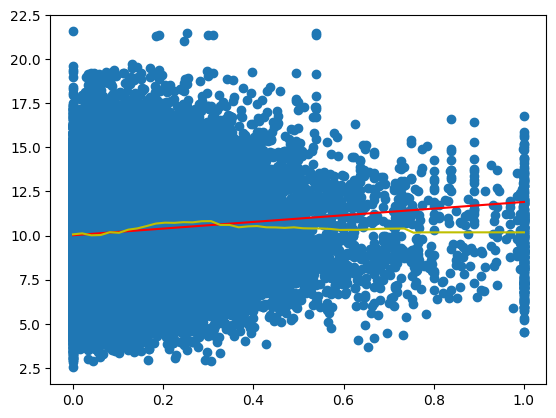

In [23]:
plt.scatter(X_train, y_train);
plt.plot(X_line, Y_hat_line,'r');
plt.plot(X_line, reg.predict(X_line),'y');

In [24]:
Y_hat_test_linear = j_lm_fit.predict(X_test)
e_linear = Y_hat_test_linear - y_test
mse_linear = np.sum(e_linear**2)/e_linear.shape[0]
mse_linear

6.03378778823921

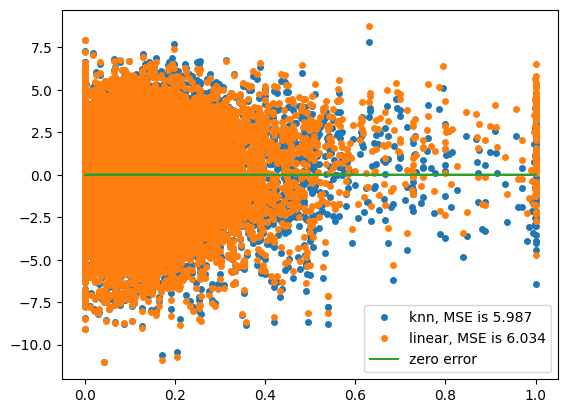

In [25]:
plt.plot(X_test,e_knn,'o', markersize=4)
plt.plot(X_test,e_linear, 'o', markersize=4)
plt.plot(X_test,0*X_test)
plt.legend(['knn, MSE is '+ str(round(mse_knn,3)),'linear, MSE is '+ str(round(mse_linear,3)),'zero error']);

You can see that for high poverty rates in particular, the linear model errors are more positive, whereas the knn errors are a bit more balanced around zero -- consistent w what we saw in the plot.